In [ ]:
# !pip install neuralprophet[live]

In [1]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow 라이브러리
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, TimeDistributed

# Neuralprophet 라이브러리
from neuralprophet import NeuralProphet

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# %cd /content/drive/MyDrive/study/Python/DL

/content/drive/MyDrive/study/Python/DL


# NeuralProphet 모델

1. Pytorch를 백엔드로 경사하강법
2. AR-Net 자기 상관회귀 모델


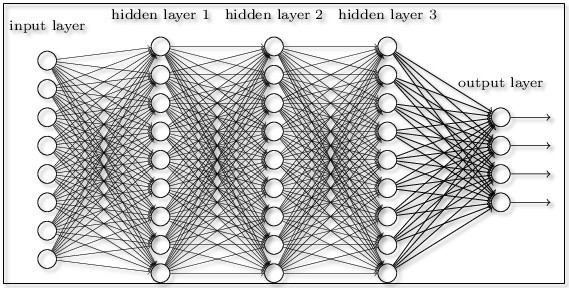

In [2]:
# 데이터 호출
airDF = pd.read_csv("C:/Users/NTX550/Documents/GitHub/T_ACADEMY_ASAC/10. DL/deeptest/data/international-airline-passengers.txt")

# 컬럼명 고정으로 반드시 변경
# 날짜 및 시간 : ds
# 실 데이터 : y
airDF.columns = ["ds", "y"] 
airDF

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
# 모델 학습
model = NeuralProphet()
result = model.fit(airDF, epochs = 100)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (9) is too small than the required number for the learning rate finder (209). The results might not be optimal.


Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [5]:
pred = model.predict(airDF)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [6]:
# model.set_plotting_backend("plotly")
model.set_plotting_backend('plotly')
model.plot(pred)

In [7]:
# 미래 예측
# 현재값과 미래값을 같이 그래프로 표현 : n_historic_predictions
future = model.make_future_dataframe(airDF, periods=100, n_historic_predictions=-1)
futreDF = model.predict(future)
model.set_plotting_backend('plotly')
model.plot(futreDF)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.972% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
